In [1]:
import numpy as np
import wandb
from tqdm import trange
from util.mnist.tools import *
from util.pickleInterface import *
from util.whatwhere.encoder import *
from util.whatwhere.decoder import *
from util.whatwhere.noise import *
from util.willshaw.memory import *
from util.willshaw.plot import *
from util.pytorch.tools import np_to_grid
from util.kldiv import *
from util.basic_utils import mse_detailed

ModuleNotFoundError: No module named 'util'

In [3]:
""" Code generation parameters """
rng = np.random.RandomState(0)  # reproducible
K = 20
Q = 21
n_epochs = 5
b = 0.8
wta = True
Fs = 2
T_what = 0.95

trial_run = False
list_Pdel = [0, 0.05, 0.1, 0.15]  # each item in this list is a different wandb run

""" load mnist """
imgs, lbls, _, _ = read_mnist(n_train=60000)
I = imgs.shape[1]
J = imgs.shape[2]

""" generate codes """
features = compute_features(imgs, lbls, K, Fs, rng, n_epochs, b, verbose=False)
codes, polar_params = compute_codes(
    imgs,
    K,
    Q,
    features,
    T_what,
    wta,
    n_epochs,
    b,
    Fs,
    verbose=False,
)

In [4]:
wn = incremental_train(codes[:10000], None)

In [5]:
ret = retreive(codes[:10000], wn)

In [9]:
s = csr_matrix.dot(codes[:10000], wn)

In [10]:
s.shape

(10000, 8820)

In [11]:
m = np.max(s, axis=-1)

In [12]:
m.shape

(10000, 1)

(array([1.15384615e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84615385e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84615385e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84615385e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15384615e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.84615385e-04,
        0.00000000e+00, 0.00000000e+00, 7.69230769e-04, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.38461538e-03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.34615385e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 8.19230769e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 9.96153846e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.17307692e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.66538462e-01, 0.00000000e+00,
        0.00000000e+00, 2.37692308e-01, 0.00000000e+00, 0.000000

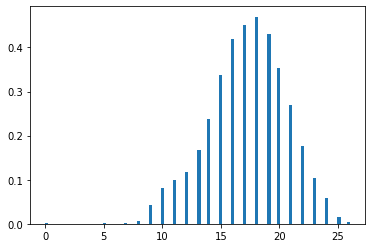

In [21]:
plt.hist(m.toarray(), bins=100, density=True)

In [22]:
codes_salt = add_zero_noise(codes[:10000], prob=0.1)

adding noise: 100%|██████████| 10000/10000 [00:03<00:00, 2962.96data-sample/s]


In [23]:
measure_sparsity(codes[:10000])

(0.001952607709750567, 0.0029478458049886623)

In [24]:
measure_sparsity(codes_salt)

(0.0017571995464852608, 0.0029478458049886623)

In [25]:
codes_pepper = add_one_noise_relative(codes[:10000], Prepl=0.1)

adding noise: 100%|██████████| 10000/10000 [00:05<00:00, 1792.72data-sample/s]


In [26]:
measure_sparsity(codes_pepper)

(0.0021455215419501133, 0.0037414965986394557)

In [27]:
def retrieve_hist(codes, W, bins=100, density=True):

    s = csr_matrix.dot(codes, W)
    max = np.max(s, axis=-1)
    plt.hist(max.toarray(), bins=bins, density=density)

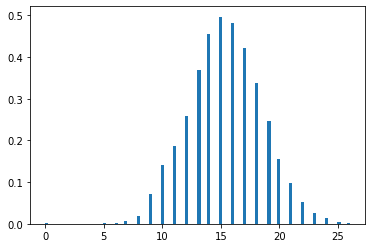

In [28]:
retrieve_hist(codes, wn)

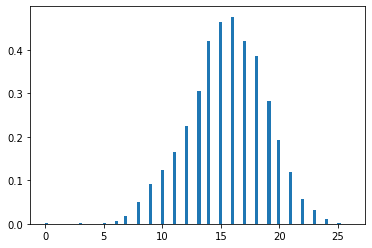

In [29]:
retrieve_hist(codes_salt, wn)

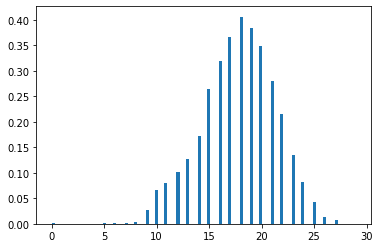

In [30]:
retrieve_hist(codes_pepper, wn)

In [32]:
wn.nnz

1863556

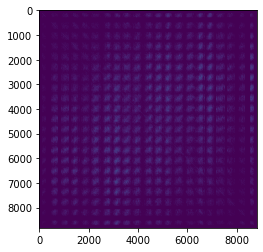

In [34]:
plt.imshow(wn.toarray())

In [35]:
neuron_usage = np.sum(wn, axis=-1)

In [36]:
neuron_usage.shape

(8820, 1)

(array([1.57052358e-02, 2.71498734e-03, 2.32858465e-03, 2.10996207e-03,
        1.71847513e-03, 1.36257792e-03, 1.39816764e-03, 1.03210193e-03,
        9.71090977e-04, 8.49069075e-04, 8.13479353e-04, 7.98226615e-04,
        6.60951974e-04, 7.16878680e-04, 6.55867728e-04, 5.94856777e-04,
        6.96541696e-04, 5.38930071e-04, 5.23677333e-04, 4.57582136e-04,
        4.98256104e-04, 4.27076660e-04, 3.96571185e-04, 4.93171858e-04,
        4.27076660e-04, 4.16908168e-04, 4.21992414e-04, 3.60981463e-04,
        3.71149955e-04, 3.66065709e-04, 3.55897217e-04, 2.99970511e-04,
        2.89802019e-04, 2.79633528e-04, 2.99970511e-04, 2.08454084e-04,
        2.59296544e-04, 1.77948608e-04, 1.52527379e-04, 1.77948608e-04,
        1.67780117e-04, 1.27106149e-04, 1.16937657e-04, 1.32190395e-04,
        1.11853411e-04, 7.11794434e-05, 8.64321812e-05, 8.13479353e-05,
        8.64321812e-05, 8.13479353e-05, 4.57582136e-05, 2.03369838e-05,
        4.57582136e-05, 2.03369838e-05, 2.03369838e-05, 5.592670

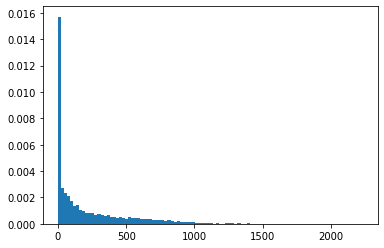

In [38]:
plt.hist(neuron_usage, bins=100, density=True)

In [39]:
wn = incremental_train(codes[10000:60000], wn)

In [40]:
wn.nnz

6044310

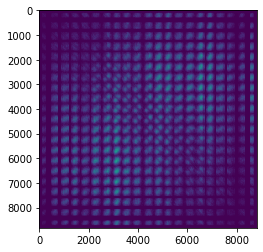

In [41]:
plt.imshow(wn.toarray(), vmax=1, vmin=0)

In [42]:
neuron_usage = np.sum(wn, axis=-1)

In [43]:
neuron_usage.shape

(8820, 1)

(array([6.15758532e-03, 1.21290178e-03, 9.51124421e-04, 8.08601190e-04,
        6.31174310e-04, 6.57352046e-04, 6.31174310e-04, 6.19539760e-04,
        6.07905211e-04, 4.94468353e-04, 5.00285628e-04, 4.56656068e-04,
        4.04300595e-04, 4.27569694e-04, 3.72305584e-04, 3.54853760e-04,
        3.78122859e-04, 3.49036485e-04, 3.14132836e-04, 3.40310573e-04,
        2.90863737e-04, 2.73411913e-04, 2.61777364e-04, 2.47234177e-04,
        2.79229188e-04, 2.26873715e-04, 2.90863737e-04, 2.93772375e-04,
        2.41416902e-04, 2.58868726e-04, 2.73411913e-04, 2.76320550e-04,
        2.03604616e-04, 2.44325539e-04, 2.12330528e-04, 2.29782352e-04,
        2.18147803e-04, 2.41416902e-04, 2.06513253e-04, 1.80335517e-04,
        1.65792330e-04, 2.12330528e-04, 2.35599627e-04, 1.97787341e-04,
        1.94878704e-04, 1.39614594e-04, 1.59975056e-04, 1.48340506e-04,
        1.94878704e-04, 1.07619583e-04, 1.83244155e-04, 1.62883693e-04,
        1.45431869e-04, 1.36705957e-04, 1.19254132e-04, 1.425232

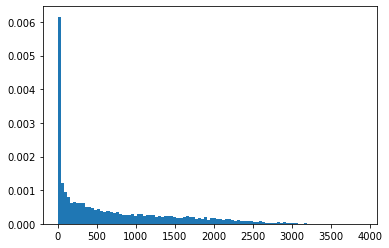

In [44]:
plt.hist(neuron_usage, bins=100, density=True)

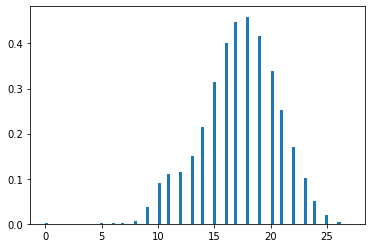

In [45]:
retrieve_hist(codes, wn)


In [46]:
codes_salt = add_zero_noise(codes)
codes_pepper = add_one_noise_relative(codes)

adding noise: 100%|██████████| 60000/60000 [00:33<00:00, 1808.76data-sample/s]


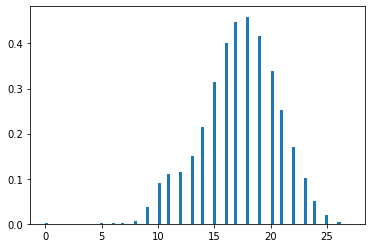

In [49]:
retrieve_hist(codes, wn)

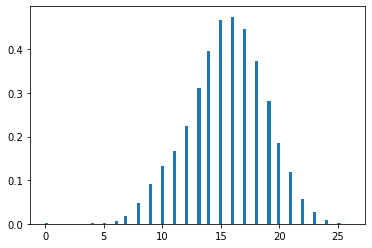

In [50]:
retrieve_hist(codes_salt, wn)

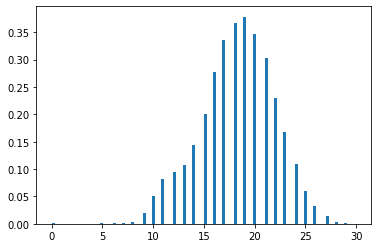

In [51]:
retrieve_hist(codes_pepper, wn)

In [52]:
codes = codes[:100]

In [53]:
codes_salt = codes_salt[:100]

In [54]:
codes_pepper= codes_pepper[:100]

In [56]:
polar_params = polar_params[:100]

In [57]:
recons = recon_img_space(codes, features, polar_params, Q, K, I, J)

In [58]:
idxs = idxs_x_random_per_class(lbls[:100])

In [60]:
idxs


array([95, 77, 28, 44,  2, 65, 83, 96, 31, 57])

In [68]:
def multiple_imshow(imgs, m=0, M=1):
    num_imgs = imgs.shape[0]
    _, axs = plt.subplots(1, num_imgs)

    for i in range(num_imgs):
        axs[i].imshow(imgs[i], vmin=m, vmax=M, cmap=plt.cm.gray)
        axs[i].set_xticks([])
        axs[i].set_yticks([])


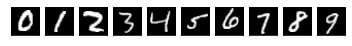

In [69]:
multiple_imshow(imgs[idxs])

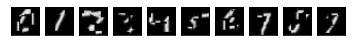

In [70]:
multiple_imshow(recons[idxs])

In [71]:
recon_s = recon_img_space(codes_salt[idxs], features, polar_params[idxs], Q, K, I, J)

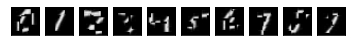

In [72]:
multiple_imshow(recon_s)

In [73]:
recon_p = recon_img_space(codes_pepper[idxs], features, polar_params[idxs], Q, K, I, J)

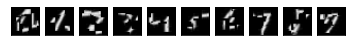

In [74]:
multiple_imshow(recon_p)

In [75]:
ret_salt = retreive(codes_salt, wn)

In [76]:
codes_salt.shape

(100, 8820)

In [77]:
recon_s = recon_img_space(ret_salt[idxs], features, polar_params[idxs], Q, K, I, J)

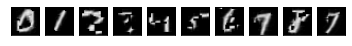

In [80]:
multiple_imshow(recon_s)

In [83]:
codes_salt

<100x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 1503 stored elements in Compressed Sparse Row format>

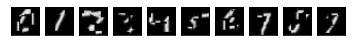

In [84]:
multiple_imshow(recons[idxs])

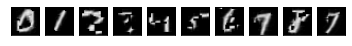

In [86]:
multiple_imshow(recon_s)

In [87]:
codes_pepper

<100x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 1849 stored elements in Compressed Sparse Row format>

In [88]:
recon_pepper_codes = recon_img_space(codes_pepper[idxs], features, polar_params[idxs], Q, K, I, J)

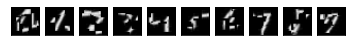

In [90]:
multiple_imshow(recon_pepper_codes)

In [91]:
ret_pepper = retreive(codes_pepper, wn)

In [93]:
recon_pepper_ret = recon_img_space(ret_pepper[idxs], features, polar_params[idxs], Q, K, I, J)

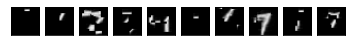

In [94]:
multiple_imshow(recon_pepper_ret)

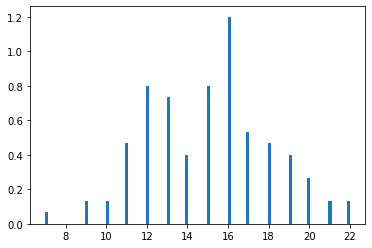

In [95]:
retrieve_hist(codes_salt, wn)

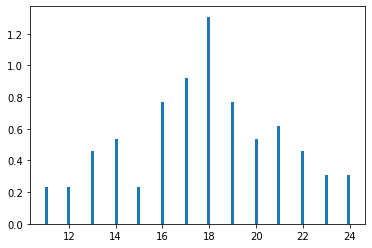

In [96]:
retrieve_hist(codes_pepper, wn)

In [97]:
measure_sparsity(ret_salt)

(0.005090702947845805, 0.017800453514739228)

In [98]:
measure_sparsity(ret_pepper)

(0.0022630385487528346, 0.009750566893424037)

In [99]:
codes_salt

<100x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 1503 stored elements in Compressed Sparse Row format>

In [100]:
codes_sp = add_one_noise_relative(codes_salt)

adding noise: 100%|██████████| 100/100 [00:00<00:00, 1599.48data-sample/s]


In [101]:
measure_sparsity(codes)

(0.0019024943310657597, 0.0027210884353741495)

In [102]:
measure_sparsity(codes_sp)

(0.001883219954648526, 0.0029478458049886623)

In [103]:
recon_sp_codes = recon_img_space(codes_sp[idxs], features, polar_params[idxs], Q, K, 28, 28)

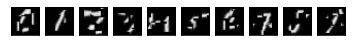

In [104]:
multiple_imshow(recon_sp_codes)

In [106]:
ret_sp = retreive(codes_sp, wn)

In [107]:
measure_sparsity(ret_sp)

(0.002566893424036281, 0.017800453514739228)

In [108]:
measure_sparsity(ret)

(0.002070408163265306, 0.007482993197278911)

In [109]:
recon_sp_codes = recon_img_space(ret_sp[idxs], features, polar_params[idxs], Q, K, 28, 28)

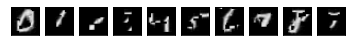

In [110]:
multiple_imshow(recon_sp_codes)

In [113]:
nome_da_var = 1

In [114]:
locals()["nome_da_var"]

1

In [115]:
wn.nnz

6044310

In [117]:
codes

<100x8820 sparse matrix of type '<class 'numpy.float64'>'
	with 1678 stored elements in Compressed Sparse Row format>

In [120]:
a = np.mean(codes, axis=0)


In [121]:
a.shape

(1, 8820)

In [124]:
np.squeeze(a)

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [125]:
a = np.squeeze(a)

In [126]:
a.shape

(1, 8820)

In [128]:
a = a.flatten()

In [129]:
a.shape

(1, 8820)

In [130]:
a = np.squeeze(a)

In [131]:
a.shape

(1, 8820)

In [133]:
a[0].shape

(1, 8820)

In [134]:
a[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [138]:
a = np.mean(codes, axis=0)



In [139]:
a = a.reshape(8820)

In [140]:
a.shape

(1, 8820)

In [142]:
a

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [149]:
arr = np.arange(10)

In [150]:
arr.shape

(10,)

In [151]:
a.shape

(1, 8820)

In [152]:
a = a.reshape(-1)

In [153]:
a.shape

(1, 8820)

In [154]:
a = a.reshape(-1,)

In [155]:
a.shape

(1, 8820)

In [156]:
a1 = a.reshape(-1,)

In [157]:
a1.shape

(1, 8820)

In [158]:
a1 = a[0]

In [159]:
a.shape

(1, 8820)

In [160]:
a1.shape

(1, 8820)

In [161]:
a = a.reshape(8820)

In [162]:
a.shape

(1, 8820)

In [163]:
a

matrix([[0., 0., 0., ..., 0., 0., 0.]])

In [164]:
a = np.array(a)

In [165]:
a

array([[0., 0., 0., ..., 0., 0., 0.]])

In [166]:
a = a.reshape(-1,)

In [167]:
a.shape

(8820,)

In [168]:
def codes_dist(codes):
    avg = np.array(np.avg(codes, axis=0))

In [170]:
def compute_prob_dist(codes):
    return np.array(np.mean(codes, axis=0))


In [171]:
d = compute_prob_dist(codes)

In [172]:
d

array([[0., 0., 0., ..., 0., 0., 0.]])

In [173]:
d.shape

(1, 8820)

In [174]:
def compute_prob_dist(codes):
    d = np.mean(codes, axis=0)
    return np.array(d).reshape(-1,)

In [175]:
d = compute_prob_dist(codes)

In [176]:
d.shape

(8820,)

<BarContainer object of 8820 artists>

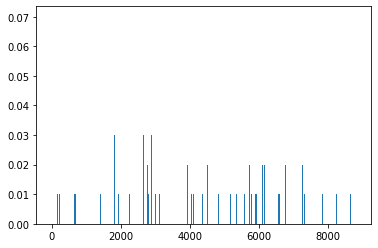

In [177]:
plt.bar(np.arange(d.shape[0]), d)

In [178]:
a = np.arange(10)

In [181]:
from util.whatwhere.create import *

In [182]:
codes.shape

(100, 8820)

In [183]:
measure_sparsity(codes, verbose=True)

Coded training set:
avg sparsity = 0.0019024943310657597
densest (%B) = 0.0027210884353741495


(0.0019024943310657597, 0.0027210884353741495)

In [198]:
d = compute_prob_dist(codes)

In [199]:
from util.whatwhere.create import *

In [201]:
def sample_from_dist(dist, n=1):
    samples = np.random.rand(n, dist.shape[0])
    samples = samples - dist  # subtracts the dist from each row
    samples[samples < 0] = 0
    samples[samples >= 0] = 1
    return csr_matrix(samples)

In [202]:
d = compute_prob_dist(codes)
s = sample_from_dist(d, n=100)

In [203]:
measure_sparsity(s)


(1.0, 1.0)

In [204]:
s.shape

(100, 8820)

In [205]:
s.nnz

882000

In [207]:
d = compute_prob_dist(codes)
s = sample_from_dist(d, n=1000)

In [208]:
measure_sparsity(s)

(1.0, 1.0)

In [209]:
dist = compute_prob_dist(codes)

In [210]:
dist.shape

(8820,)

In [211]:
n=100

In [212]:
samples = np.random.rand(n, dist.shape[0])

In [213]:
samples.shape

(100, 8820)

In [214]:
samples = samples - dist  # subtracts the dist from each row

In [215]:
samples.shape

(100, 8820)

In [216]:
np.sum(samples)

439407.62692463526

In [217]:
samples = np.random.rand(n, dist.shape[0])

In [218]:
np.sum(samples)

441207.8135897407

In [219]:
samples = samples-dist

In [220]:
np.sum(samples)

439529.81358974054

In [221]:
len(samples)

100

In [224]:
samples[samples<0].size

1694

In [225]:
samples[samples>=0].size

880306

In [226]:
samples[samples>=0].size + samples[samples<0].size

882000

In [236]:
from util.whatwhere.create import sample_from_dist

In [237]:
d

array([0., 0., 0., ..., 0., 0., 0.])

In [238]:
d.shape

(8820,)

In [1]:
from util.whatwhere.create import sample_from_dist

In [3]:
from util.whatwhere.create import *

In [5]:
import numpy as np
import wandb
from tqdm import trange
from util.mnist.tools import *
from util.pickleInterface import *
from util.whatwhere.encoder import *
from util.whatwhere.decoder import *
from util.whatwhere.noise import *
from util.willshaw.memory import *
from util.willshaw.plot import *
from util.pytorch.tools import np_to_grid
from util.kldiv import *
from util.basic_utils import mse_detailed

In [6]:
""" Code generation parameters """
rng = np.random.RandomState(0)  # reproducible
K = 20
Q = 21
n_epochs = 5
b = 0.8
wta = True
Fs = 2
T_what = 0.95

trial_run = False
list_Pdel = [0, 0.05, 0.1, 0.15]  # each item in this list is a different wandb run

""" load mnist """
imgs, lbls, _, _ = read_mnist(n_train=60000)
I = imgs.shape[1]
J = imgs.shape[2]

""" generate codes """
features = compute_features(imgs, lbls, K, Fs, rng, n_epochs, b, verbose=False)
codes, polar_params = compute_codes(
    imgs,
    K,
    Q,
    features,
    T_what,
    wta,
    n_epochs,
    b,
    Fs,
    verbose=False,
)

In [7]:
d = compute_prob_dist(codes)

In [8]:
s = sample_from_dist(d,n=100)

In [9]:
s.shape

(100, 8820)

In [10]:
s.nnz

0

In [11]:
measure_sparsity(s)

(0.0, 0.0)

In [12]:
from util.whatwhere.create import *

In [13]:
s = sample_from_dist(d,n=100)

In [14]:

s.nnz

0

In [15]:
def sample_from_dist(dist, n=1):
    samples = np.random.rand(n, dist.shape[0])
    samples = samples - dist  # subtracts the dist from each row
    samples[samples >= 0] = 0
    samples[samples < 0] = 1
    return csr_matrix(samples)



In [16]:
measure_sparsity(s)

(0.0, 0.0)

In [17]:
s = sample_from_dist(d,n=100)

In [18]:

s.nnz

1688

In [19]:
measure_sparsity(s)

(0.0019138321995464853, 0.0031746031746031746)

In [20]:
s.shape

(100, 8820)

In [21]:
measure_sparsity(codes)

(0.0019500680272108843, 0.003061224489795918)

In [22]:
codes.shape

(60000, 8820)

In [23]:
ones = codes[lbls==1]

In [24]:
ones.shape

(6742, 8820)

In [25]:
d1 = compute_prob_dist(ones)

In [26]:
s1 = sample_from_dist(d1,10)

In [27]:
s1.nnz

117

In [28]:
s1.shape

(10, 8820)

In [29]:
a = np.array([0,0,1])
default_pp = np.repeat(a,10)

In [30]:
default_pp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
a = np.array([0,0,1])
default_pp = np.repeat(a,repeats=10, axis=0)

In [32]:
a

array([0, 0, 1])

In [33]:
default_pp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [34]:
a = np.array([[0,0,1]])
default_pp = np.repeat(a,repeats=10, axis=0)
default_pp

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [46]:
def recon_img_space(codes, features, polar_params, Q, K, I=28, J=28):

    if polar_params == None:
        default = np.array([[0, 0, 1]])  # default is center at (0,0) and radius 1
        polar_params = np.repeat(default, repeats=codes.shape[0], axis=0)

    codes = codes.toarray()
    if codes.shape[0] != polar_params.shape[0]:
        print(
            f"WARNING: codes ({codes.shape[0]}) and polar params ({polar_params.shape[0]}) have different sizes"
        )

    recon = np.zeros((codes.shape[0], I, J))
    codes = codes.reshape((-1, Q, Q, K))
    for i in trange(
        codes.shape[0], desc="reconstructing", unit="datasamples", leave=False
    ):
        params = polar_params[i]
        pol = ungrid(codes[i])
        ret = unpolar(pol, params)
        h = unenum(ret, I, J, K)
        recon[i] = reconstruct(h, features)
    return recon

In [47]:
r1 = recon_img_space(s1, features, None, Q, K)

In [48]:
r1.shape

(10, 28, 28)

In [50]:
from util.plot import *

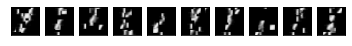

In [51]:
multiple_imshow(r1)

In [52]:
wn = incremental_train(codes[lbls==1], None)

In [53]:
codes.shape

(60000, 8820)

In [54]:
codes[lbls==1].shape

(6742, 8820)

In [55]:
wn.nnz

321820

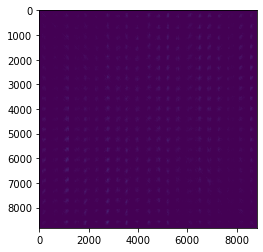

In [57]:
plt.imshow(wn.toarray())

In [63]:
s1_ret = retreive(s1, wn)

In [65]:
r1_ret = recon_img_space(s1_ret, features, None, Q, K)

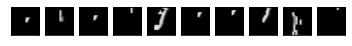

In [66]:
multiple_imshow(r1_ret)

In [69]:
wn = incremental_train(codes, None)

In [70]:
s1.shape

(10, 8820)

In [71]:
ret1 = retreive(s1, wn)

In [72]:
recon_ret1 = recon_img_space(ret1, features, None, Q,K)

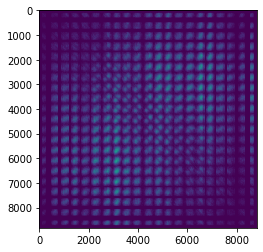

In [73]:
plt.imshow(wn.toarray())

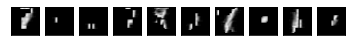

In [74]:
multiple_imshow(recon_ret1)